#Header

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt

#Read File

In [248]:
from google.colab import files
uploaded1 = files.upload()
df_test = pd.read_csv(io.StringIO(uploaded1['kendaraan_test.csv'].decode('utf-8')))

Saving kendaraan_test.csv to kendaraan_test (1).csv


In [249]:
from google.colab import files
uploaded2 = files.upload()
df_train = pd.read_csv(io.StringIO(uploaded2['kendaraan_train.csv'].decode('utf-8')))

Saving kendaraan_train.csv to kendaraan_train (1).csv


Reset Data DF

In [ ]:
df_train = pd.read_csv(io.StringIO(uploaded2['kendaraan_train.csv'].decode('utf-8')))
df_test = pd.read_csv(io.StringIO(uploaded1['kendaraan_test.csv'].decode('utf-8')))

In [ ]:
df_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


#Preprocessing

Drop column

In [ ]:
df_train.drop('id',axis=1,inplace=True)
df_train.drop('Tertarik',axis=1,inplace=True)

In [ ]:
df_test.drop('Tertarik',axis=1,inplace=True)

Missing Value

In [ ]:
#data test
miss_data = df_test.isnull()
for column in miss_data.columns.values.tolist():
  print(column)
  print(miss_data[column].value_counts())

Jenis_Kelamin
False    47639
Name: Jenis_Kelamin, dtype: int64
Umur
False    47639
Name: Umur, dtype: int64
SIM
False    47639
Name: SIM, dtype: int64
Kode_Daerah
False    47639
Name: Kode_Daerah, dtype: int64
Sudah_Asuransi
False    47639
Name: Sudah_Asuransi, dtype: int64
Umur_Kendaraan
False    47639
Name: Umur_Kendaraan, dtype: int64
Kendaraan_Rusak
False    47639
Name: Kendaraan_Rusak, dtype: int64
Premi
False    47639
Name: Premi, dtype: int64
Kanal_Penjualan
False    47639
Name: Kanal_Penjualan, dtype: int64
Lama_Berlangganan
False    47639
Name: Lama_Berlangganan, dtype: int64


In [ ]:
#data train
miss_data = df_train.isnull()
for column in miss_data.columns.values.tolist():
  print(column)
  print(miss_data[column].value_counts())

Jenis_Kelamin
False    271391
True      14440
Name: Jenis_Kelamin, dtype: int64
Umur
False    271617
True      14214
Name: Umur, dtype: int64
SIM
False    271427
True      14404
Name: SIM, dtype: int64
Kode_Daerah
False    271525
True      14306
Name: Kode_Daerah, dtype: int64
Sudah_Asuransi
False    271602
True      14229
Name: Sudah_Asuransi, dtype: int64
Umur_Kendaraan
False    271556
True      14275
Name: Umur_Kendaraan, dtype: int64
Kendaraan_Rusak
False    271643
True      14188
Name: Kendaraan_Rusak, dtype: int64
Premi
False    271262
True      14569
Name: Premi, dtype: int64
Kanal_Penjualan
False    271532
True      14299
Name: Kanal_Penjualan, dtype: int64
Lama_Berlangganan
False    271839
True      13992
Name: Lama_Berlangganan, dtype: int64


Menggabungkan data

In [ ]:
del df_kendaraan
df_kendaraan = df_train.append(df_test, ignore_index=True)
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      319030 non-null  object 
 1   Umur               319256 non-null  float64
 2   SIM                319066 non-null  float64
 3   Kode_Daerah        319164 non-null  float64
 4   Sudah_Asuransi     319241 non-null  float64
 5   Umur_Kendaraan     319195 non-null  object 
 6   Kendaraan_Rusak    319282 non-null  object 
 7   Premi              318901 non-null  float64
 8   Kanal_Penjualan    319171 non-null  float64
 9   Lama_Berlangganan  319478 non-null  float64
dtypes: float64(7), object(3)
memory usage: 25.4+ MB


In [ ]:
print("JK :\n",df_kendaraan['Jenis_Kelamin'].describe(),"\n")
print("Umur :\n",df_kendaraan['Umur'].describe(),"\n")
print("Sim :\n",df_kendaraan['SIM'].describe(),"\n")
print("Kode Daerah :\n",df_kendaraan['Kode_Daerah'].describe(),"\n")
print("Sudah asuransi :\n",df_kendaraan['Sudah_Asuransi'].describe(),"\n")
print("Umur Kendaraan :\n",df_kendaraan['Umur_Kendaraan'].describe(),"\n")
print("Kendaraan Rusak :\n",df_kendaraan['Kendaraan_Rusak'].describe(),"\n")
print("Premi :\n",df_kendaraan['Premi'].describe(),"\n")
print("Kanal Penjualan :\n",df_kendaraan['Kanal_Penjualan'].describe(),"\n")
print("Lama Berlangganan :\n",df_kendaraan['Lama_Berlangganan'].describe(),"\n")

JK :
 count     319030
unique         2
top         Pria
freq      172548
Name: Jenis_Kelamin, dtype: object 

Umur :
 count    319256.000000
mean         38.840028
std          15.526398
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Umur, dtype: float64 

Sim :
 count    319066.000000
mean          0.997859
std           0.046217
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: SIM, dtype: float64 

Kode Daerah :
 count    319164.000000
mean         26.394380
std          13.246852
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Kode_Daerah, dtype: float64 

Sudah asuransi :
 count    319241.000000
mean          0.458603
std           0.498284
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sudah_

In [ ]:
#Replace missing value dengan mean / modus df_kendaraan
df_kendaraan['Umur'].mode()
df_kendaraan["Umur"].replace(np.nan, 38.844336, inplace=True)

df_kendaraan['Jenis_Kelamin'].mode()
df_kendaraan["Jenis_Kelamin"].replace(np.nan, "Pria", inplace=True)

df_kendaraan['SIM'].mode()
df_kendaraan["SIM"].replace(np.nan, 1, inplace=True)

df_kendaraan['Kode_Daerah'].mode()
df_kendaraan["Kode_Daerah"].replace(np.nan, 27, inplace=True)

df_kendaraan['Sudah_Asuransi'].mode()
df_kendaraan["Sudah_Asuransi"].replace(np.nan, 0.458778, inplace=True)

df_kendaraan['Umur_Kendaraan'].mode()
df_kendaraan["Umur_Kendaraan"].replace(np.nan, "1-2 Tahun", inplace=True)

df_kendaraan['Kendaraan_Rusak'].mode()
df_kendaraan["Kendaraan_Rusak"].replace(np.nan, "Pernah", inplace=True)

df_kendaraan['Premi'].mode()
df_kendaraan["Premi"].replace(np.nan, 30536.683472, inplace=True)

df_kendaraan['Kanal_Penjualan'].mode()
df_kendaraan["Kanal_Penjualan"].replace(np.nan, 112.021567, inplace=True)

df_kendaraan['Lama_Berlangganan'].mode()
df_kendaraan["Lama_Berlangganan"].replace(np.nan, 154.286302, inplace=True)


In [ ]:
df_kendaraan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Pernah,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
333465,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0
333466,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0
333467,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0
333468,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0


In [ ]:
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      333470 non-null  object 
 1   Umur               333470 non-null  float64
 2   SIM                333470 non-null  float64
 3   Kode_Daerah        333470 non-null  float64
 4   Sudah_Asuransi     333470 non-null  float64
 5   Umur_Kendaraan     333470 non-null  object 
 6   Kendaraan_Rusak    333470 non-null  object 
 7   Premi              333470 non-null  float64
 8   Kanal_Penjualan    333470 non-null  float64
 9   Lama_Berlangganan  333470 non-null  float64
dtypes: float64(7), object(3)
memory usage: 25.4+ MB


Ganti Objek menjadi Category

In [ ]:
object_column = df_kendaraan.select_dtypes(['object']).columns

category_column = df_kendaraan.select_dtypes(['category']).columns
df_kendaraan[object_column]=df_kendaraan[object_column].apply(lambda x: x.astype('category'))
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Jenis_Kelamin      333470 non-null  category
 1   Umur               333470 non-null  float64 
 2   SIM                333470 non-null  float64 
 3   Kode_Daerah        333470 non-null  float64 
 4   Sudah_Asuransi     333470 non-null  float64 
 5   Umur_Kendaraan     333470 non-null  category
 6   Kendaraan_Rusak    333470 non-null  category
 7   Premi              333470 non-null  float64 
 8   Kanal_Penjualan    333470 non-null  float64 
 9   Lama_Berlangganan  333470 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 18.8 MB


Mapping Data Kategori ke Numeric

In [ ]:
df_kendaraan[object_column] = df_kendaraan[object_column].apply(lambda x: x.cat.codes)
df_kendaraan[category_column] = df_kendaraan[category_column].apply(lambda x: x.cat.codes)


In [ ]:
df_kendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0
2,0,21.0,1.0,46.0,1.0,1,1,32733.0,160.0,119.0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0
4,0,50.0,1.0,35.0,0.0,2,0,34857.0,88.0,194.0


Check Data sebelum masuk ke Pemodelan

In [ ]:
df_kendaraan.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333470 entries, 0 to 333469
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      333470 non-null  int8   
 1   Umur               333470 non-null  float64
 2   SIM                333470 non-null  float64
 3   Kode_Daerah        333470 non-null  float64
 4   Sudah_Asuransi     333470 non-null  float64
 5   Umur_Kendaraan     333470 non-null  int8   
 6   Kendaraan_Rusak    333470 non-null  int8   
 7   Premi              333470 non-null  float64
 8   Kanal_Penjualan    333470 non-null  float64
 9   Lama_Berlangganan  333470 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 18.8 MB


#Clustering - Pemodelan

                   Jenis_Kelamin      Umur  ...  Kanal_Penjualan  Lama_Berlangganan
Jenis_Kelamin           1.000000 -0.136722  ...         0.106014           0.002078
Umur                   -0.136722  1.000000  ...        -0.553537          -0.000214
SIM                     0.016709 -0.075874  ...         0.042163          -0.001605
Kode_Daerah            -0.000164  0.041204  ...        -0.040978          -0.003961
Sudah_Asuransi          0.077327 -0.243219  ...         0.210385           0.001832
Umur_Kendaraan          0.105962 -0.492341  ...         0.367384           0.001969
Kendaraan_Rusak         0.083993 -0.250903  ...         0.210592           0.000527
Premi                  -0.004438  0.064256  ...        -0.109252          -0.001500
Kanal_Penjualan         0.106014 -0.553537  ...         1.000000           0.000209
Lama_Berlangganan       0.002078 -0.000214  ...         0.000209           1.000000

[10 rows x 10 columns]


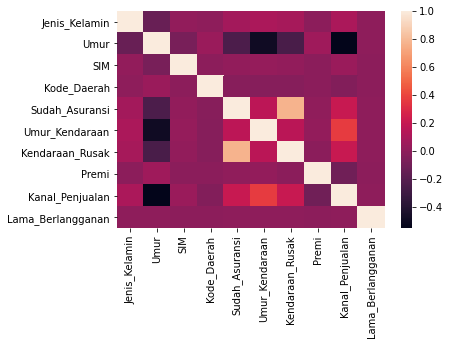

In [ ]:
corr = df_kendaraan.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Normalisasi Data

In [275]:
normalisasi = df_kendaraan.apply(lambda x: (x-np.mean(x)) / (np.max(x)-np.min(x)))
normalisasi.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.560734,-0.136003,0.002048,0.126532,0.541389,0.252802,0.52584,-0.004689,0.246640,-0.198302
1,-0.439266,0.140920,0.002048,0.241916,-0.458611,0.752802,-0.47416,-0.008836,-0.512619,0.012770
2,-0.439266,-0.274465,0.002048,0.376532,0.541389,0.252802,0.52584,0.004062,0.296023,-0.122178
3,0.560734,0.294766,0.002048,0.414993,-0.458611,-0.247198,0.52584,-0.051940,0.073801,-0.315949
4,-0.439266,0.171689,0.002048,0.164993,-0.458611,0.752802,-0.47416,0.008013,-0.148421,0.137338


Data yang saya pakai adalah umur dan Kanal Penjualan berdasarkan pemilihan heatmap

In [276]:
data = normalisasi.iloc[:, [1,8]].values
#Data yang saya gunakan hanya 50000, dikarenakan runtime yang lama jika seluruh data digunakan
data = data[:50000]
data

array([[-1.36003257e-01,  2.46640241e-01],
       [ 1.40919820e-01, -5.12619019e-01],
       [-2.74464795e-01,  2.96022957e-01],
       ...,
       [-2.28310949e-01, -1.40209903e-04],
       [-1.82157103e-01,  2.46640241e-01],
       [ 6.34509398e-05, -1.29902969e-01]])

mencari nilai k (elbow method)

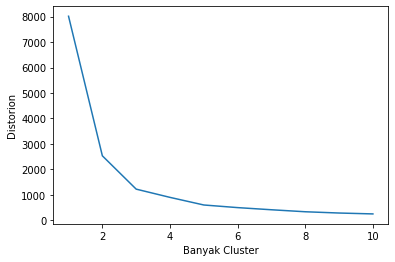

In [283]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Banyak Cluster')
plt.ylabel('Distorion')
plt.show()

In [278]:
#banyaknya cluster yang saya gunakan adalah 3
k = 3
#Perulangan yang saya lakukan adalah 100x
n = 100

Clustering K-Means

Text(0.5, 1.0, 'Plot Data Awal')

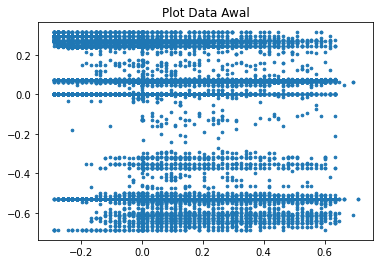

In [279]:
plt.scatter(data[:,0], data[:,1],  s=7)
plt.title('Plot Data Awal')

In [315]:
def randCentroid(k,data):
  centroid=np.array([]).reshape(data.shape[1],0)
  for i in range(k):
    rand=rd.randint(0,data.shape[0]-1)
    centroid=np.c_[centroid,data[rand]]
  return centroid

def jarakEuclid(k,data):
  euclidian = np.array([]).reshape(data.shape[0],0)
  for j in range(k):
    dist = np.sum((data-centroid[:,j])**2, axis=1)
    euclidian=np.c_[euclidian, dist]
  return euclidian

def clustering(jarakMin,data):
  j = 0
  for j in range(k):
    cent[j+1]=np.array([]).reshape(2,0)
  for j in range(data.shape[0]):
    cent[minimum[j]]=np.c_[cent[minimum[j]],data[j]]
  for j in range(k):
    cent[j+1]=cent[j+1].T
  for j in range(k):
    centroid[:,j]=np.mean(cent[j+1], axis=0)
  return cent

Clustering

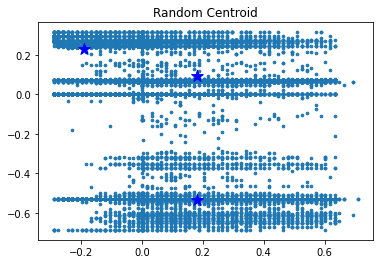

In [294]:
randCentroid(k,data)

plt.scatter(data[:,0],data[:,1], s=7)
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Random Centroid')
plt.legend
plt.show()

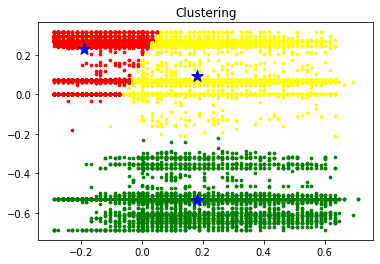

In [295]:
cluster = {}

for i in range(n):
  minimum = np.argmin(jarakEuclid(k,data), axis=1)+1
  cent = {}
  
  #Hitung Mean Setiap Cluster
  cluster = clustering(minimum,data)

color=['red','yellow','green']
labels=['Cluster 1','Cluster 2','Cluster 3']
for i in range(k):
  plt.scatter(cluster[i+1][:,0], cluster[i+1][:,1], c = color[i], label = labels[i], s=7)
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Clustering')
plt.show()

In [296]:
cluster

{1: array([[-1.36003257e-01,  2.46640241e-01],
        [-2.74464795e-01,  2.96022957e-01],
        [-2.74464795e-01,  2.46640241e-01],
        ...,
        [-2.43695564e-01,  2.46640241e-01],
        [-2.28310949e-01, -1.40209903e-04],
        [-1.82157103e-01,  2.46640241e-01]]),
 2: array([[ 2.94765974e-01,  7.38007345e-02],
        [ 1.71689051e-01, -1.48421488e-01],
        [ 2.33227512e-01,  7.38007345e-02],
        ...,
        [ 1.71689051e-01, -1.40209903e-04],
        [ 3.87073666e-01,  7.38007345e-02],
        [ 6.34509398e-05, -1.29902969e-01]]),
 3: array([[ 0.14091982, -0.51261902],
        [ 0.11015059, -0.50027334],
        [ 0.09476597, -0.53113754],
        ...,
        [ 0.43322751, -0.53113754],
        [ 0.3255352 , -0.53113754],
        [ 0.38707367, -0.50644618]])}

#Eksperimen

In [310]:
print(dataEksperimen)

[[ 0.54138917  0.52584041]
 [-0.45861083 -0.47415959]
 [ 0.54138917  0.52584041]
 ...
 [ 0.54138917 -0.47415959]
 [-0.45861083 -0.47415959]
 [-0.45861083 -0.47415959]]


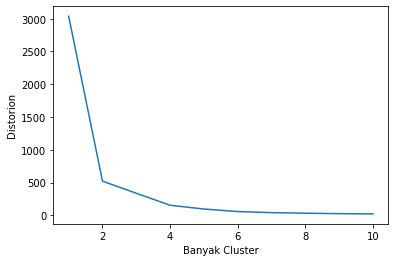

In [321]:
#umur dan kendaraan_rusak
dataEksperimen = normalisasi.iloc[:, [1,6]].values
dataEksperimen = dataEksperimen[:10000]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(dataEksperimen)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Banyak Cluster')
plt.ylabel('Distorion')
plt.show()

In [329]:
#banyaknya cluster yang saya gunakan adalah 3
k = 3
#Perulangan yang saya lakukan adalah 100x
n = 50

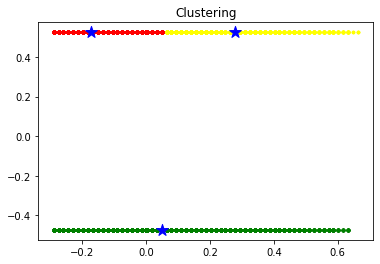

In [330]:
randCentroid(k,dataEksperimen)
cluster = {}

for i in range(n):
  minimum = np.argmin(jarakEuclid(k,dataEksperimen), axis=1)+1
  cent = {}
  
  #Hitung Mean Setiap Cluster
  cluster = clustering(minimum,dataEksperimen)

color=['red','yellow','green']
labels=['Cluster 1','Cluster 2','Cluster 3']
for i in range(k):
  plt.scatter(cluster[i+1][:,0], cluster[i+1][:,1], c = color[i], label = labels[i], s=7)
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Clustering')
plt.show()

In [324]:
cluster

{1: array([[-1.36003257e-01,  5.25840405e-01],
        [-2.74464795e-01,  5.25840405e-01],
        [-2.74464795e-01,  5.25840405e-01],
        ...,
        [ 6.34509398e-05,  5.25840405e-01],
        [-2.12926334e-01,  5.25840405e-01],
        [-2.12926334e-01,  5.25840405e-01]]),
 2: array([[0.29476597, 0.52584041],
        [0.4178429 , 0.52584041],
        [0.11015059, 0.52584041],
        ...,
        [0.20245828, 0.52584041],
        [0.1255352 , 0.52584041],
        [0.06399674, 0.52584041]]),
 3: array([[ 0.14091982, -0.47415959],
        [ 0.17168905, -0.47415959],
        [-0.08984941, -0.47415959],
        ...,
        [ 0.58707367, -0.47415959],
        [-0.25908018, -0.47415959],
        [ 0.55630444, -0.47415959]])}